In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from pathlib import Path
import pandas as pd
import json

paths = [
    Path("../../analysis/mouse_m01_d2/results/simclr_neural_pc1_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/simclr_neural_pc1_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/simclr_neural_pc1_m03_d4.json"),
    Path("../../analysis/mouse_m01_d2/results/vgg19_neural_pc1_m01_d2.json"),
    Path("../../analysis/mouse_m02_d3/results/vgg19_neural_pc1_m02_d3.json"),
    Path("../../analysis/mouse_m03_d4/results/vgg19_neural_pc1_m03_d4.json"),
]

all_data = []
for path in paths:
    with open(path, "r") as f:
        data = json.load(f)
        all_data.extend(data)

df = pd.DataFrame(all_data)
df = df.sort_values(["mouse_id", "layer", "n_pcs"], na_position='first').reset_index(drop=True)

print(f"Loaded {len(df)} rows from {len(paths)} files.")
df.head(100)

Loaded 210 rows from 6 files.


,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,vgg19_neural_pc1,m01_d2,conv2_2,NaN,0.407,0.431,1.396,1.423,0.152,NaN
1,vgg19_neural_pc1,m01_d2,conv2_2,10.0,0.342,0.362,1.396,1.423,0.172,-0.099
2,vgg19_neural_pc1,m01_d2,conv2_2,20.0,0.367,0.389,1.396,1.423,0.169,-0.094
3,vgg19_neural_pc1,m01_d2,conv2_2,50.0,0.404,0.427,1.396,1.423,0.167,-0.087
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,1.396,1.423,0.166,-0.091
...,...,...,...,...,...,...,...,...,...,...
95,simclr_neural_pc1,m02_d3,fc,200.0,0.510,0.555,1.704,1.712,0.128,0.107
96,simclr_neural_pc1,m02_d3,fc,300.0,0.512,0.557,1.704,1.712,0.129,0.105
97,simclr_neural_pc1,m02_d3,fc,400.0,0.514,0.560,1.704,1.712,0.129,0.110
98,simclr_neural_pc1,m02_d3,fc,500.0,0.512,0.558,1.704,1.712,0.129,0.084


In [2]:
# Filter to only rows where n_pcs is 100 - standardise
df_pcs = df[(df["n_pcs"] == 100)]
df_pcs

,model_target,mouse_id,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
4,vgg19_neural_pc1,m01_d2,conv2_2,100.0,0.407,0.431,1.396,1.423,0.166,-0.091
9,vgg19_neural_pc1,m01_d2,conv3_4,100.0,0.407,0.430,1.515,1.462,0.202,-0.056
14,vgg19_neural_pc1,m01_d2,conv4_4,100.0,0.394,0.417,1.616,1.645,0.169,0.000
19,vgg19_neural_pc1,m01_d2,conv5_4,100.0,0.279,0.296,1.867,1.698,0.125,0.252
24,simclr_neural_pc1,m01_d2,fc,100.0,0.477,0.503,1.702,1.711,0.188,0.108
33,vgg19_neural_pc1,m01_d2,fc2,100.0,0.263,0.280,1.583,1.589,0.107,0.447
38,simclr_neural_pc1,m01_d2,layer1,100.0,0.425,0.450,3.891,4.271,0.168,-0.114
47,simclr_neural_pc1,m01_d2,layer2,100.0,0.485,0.513,3.487,3.872,0.151,-0.080
56,simclr_neural_pc1,m01_d2,layer3,100.0,0.490,0.517,1.911,1.917,0.182,-0.005
65,simclr_neural_pc1,m01_d2,layer4,100.0,0.470,0.496,1.887,1.894,0.143,0.085


In [3]:
# Group by layer and compute mean of each metric
avg_metrics = df_pcs.groupby(["model_target", "layer"]).mean(numeric_only=True).reset_index()
avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score
0,simclr_neural_pc1,fc,100.0,0.455000,0.486000,1.703000,1.712333,0.137667,0.108
1,simclr_neural_pc1,layer1,100.0,0.415333,0.444000,3.820000,4.203000,0.129000,-0.114
2,simclr_neural_pc1,layer2,100.0,0.471000,0.503333,3.463333,3.928667,0.122333,-0.080
3,simclr_neural_pc1,layer3,100.0,0.496333,0.530000,1.891333,1.896333,0.141000,-0.005
4,simclr_neural_pc1,layer4,100.0,0.469667,0.501667,1.882333,1.889333,0.106667,0.085
5,vgg19_neural_pc1,conv2_2,100.0,0.390333,0.418333,1.395667,1.421333,0.116667,-0.091
6,vgg19_neural_pc1,conv3_4,100.0,0.378333,0.404667,1.517667,1.513000,0.139000,-0.056
7,vgg19_neural_pc1,conv4_4,100.0,0.352333,0.377667,1.624000,1.653667,0.114000,0.000
8,vgg19_neural_pc1,conv5_4,100.0,0.271000,0.291000,1.791333,1.708667,0.079333,0.252
9,vgg19_neural_pc1,fc2,100.0,0.256667,0.276667,1.588000,1.590333,0.069667,0.447


In [4]:
# Get model name
avg_metrics["model"] = avg_metrics["model_target"].str.extract(r"(simclr|vgg19|gabor)")

# Compute SEM and merge
sem_df = df_pcs.groupby('layer')['spearman_correlation'].sem().reset_index()
sem_df.columns = ['layer', 'sem_spearman_correlation']
avg_metrics = avg_metrics.merge(sem_df, on='layer', how='left')

avg_metrics

,model_target,layer,n_pcs,test_r2,mean_fev,alpha,alpha_no_pc1,spearman_correlation,silhouette_score,model,sem_spearman_correlation
0,simclr_neural_pc1,fc,100.0,0.455000,0.486000,1.703000,1.712333,0.137667,0.108,simclr,0.026523
1,simclr_neural_pc1,layer1,100.0,0.415333,0.444000,3.820000,4.203000,0.129000,-0.114,simclr,0.020421
2,simclr_neural_pc1,layer2,100.0,0.471000,0.503333,3.463333,3.928667,0.122333,-0.080,simclr,0.015920
3,simclr_neural_pc1,layer3,100.0,0.496333,0.530000,1.891333,1.896333,0.141000,-0.005,simclr,0.020551
4,simclr_neural_pc1,layer4,100.0,0.469667,0.501667,1.882333,1.889333,0.106667,0.085,simclr,0.018550
5,vgg19_neural_pc1,conv2_2,100.0,0.390333,0.418333,1.395667,1.421333,0.116667,-0.091,vgg19,0.032256
6,vgg19_neural_pc1,conv3_4,100.0,0.378333,0.404667,1.517667,1.513000,0.139000,-0.056,vgg19,0.046608
7,vgg19_neural_pc1,conv4_4,100.0,0.352333,0.377667,1.624000,1.653667,0.114000,0.000,vgg19,0.039247
8,vgg19_neural_pc1,conv5_4,100.0,0.271000,0.291000,1.791333,1.708667,0.079333,0.252,vgg19,0.024524
9,vgg19_neural_pc1,fc2,100.0,0.256667,0.276667,1.588000,1.590333,0.069667,0.447,vgg19,0.021949


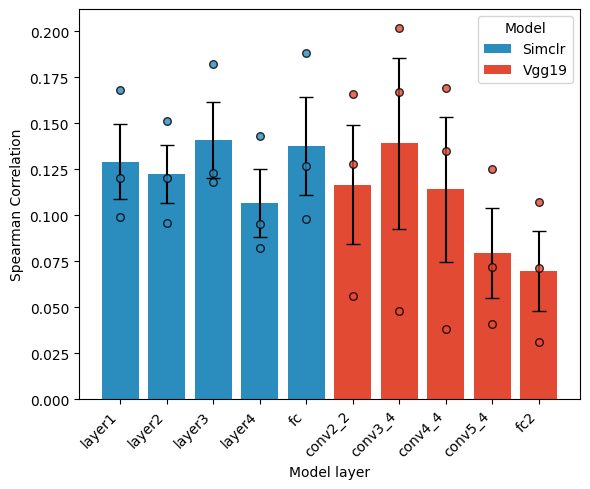

In [5]:
from cortexlib.utils.plotting import simclr_colours, vgg19_colours

# Clean labels and sort
ordered_labels = [
    'layer1', 'layer2', 'layer3', 'layer4', 'fc',
    'conv2_2', 'conv3_4', 'conv4_4', 'conv5_4', 'fc2'
]
for df in [avg_metrics, df_pcs]:
    df["layer"] = pd.Categorical(
        df["layer"], categories=ordered_labels, ordered=True)

avg_metrics = avg_metrics.sort_values('layer')

# Colour mapping by model
model_colour = {
    'simclr': simclr_colours['layer4'],
    'vgg19': vgg19_colours['conv5_4'],
}

avg_metrics["colour"] = avg_metrics["model_target"].str.lower().map(
    lambda s: next((v for k, v in model_colour.items() if k in s), None)
)

# Plot
plt.figure(figsize=(6, 5))

# Error bars
plt.bar(
    avg_metrics['layer'],
    avg_metrics['spearman_correlation'],
    yerr=avg_metrics['sem_spearman_correlation'],
    capsize=5,
    color=avg_metrics['colour']
)

# Individual dots
for _, row in df_pcs.iterrows():
    plt.scatter(
        row["layer"], row["spearman_correlation"],
        color=model_colour[row["model_target"].split("_")[0]],
        edgecolor='black', s=30, alpha=0.8, zorder=3
    )

# Axis and legend
plt.ylabel('Spearman Correlation')
plt.xlabel('Model layer')
plt.xticks(rotation=45, ha='right')
plt.legend(
    handles=[Patch(facecolor=color, label=model.capitalize())
                for model, color in model_colour.items()],
    title="Model"
)
plt.tight_layout()
plt.show()